# Start of Computer Vision Course

## Task1: How to represent the grid of Black-White Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im = np.arange(256)

In [3]:
im

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
im.shape

(256,)

In [5]:
im = im[np.newaxis,:]

In [6]:
im.shape

(1, 256)

#### You can see this basically represents zero, represents the black color. And the 256 rpresents the pure white color, and we have only two grayscales in between

In [7]:
im = np.repeat(im,100,axis=0)

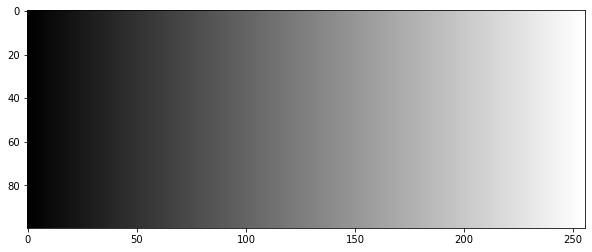

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')

## Task2: RGB - HSV Conversion

In [9]:
def rgb_to_hsv_convert(rgb_image):
    height = rgb_image.shape[0]
    width = rgb_image.shape[1]
    
    hsv_image = np.zeros((height, width, 3))
    
    for i in np.arange(height):
        for j in np.arange(width):
            r = rgb_image.item(i,j,0)
            g = rgb_image.item(i,j,1)
            b = rgb_image.item(i,j,2)
            
            r_scale = r/255.0
            g_scale = g/255.0
            b_scale = b/255.0
            
            cmax = max(r_scale,g_scale,b_scale)
            cmin = max(r_scale,g_scale,b_scale)
            diff = cmax - cmin
            
            # V Calculation
            V = cmax * 100
            
            # Saturation Calculation
            if cmax==0:
                S = 0
            else:
                S = (diff / cmax) * 100
                
            # Hue Calculation
            if cmax == cmin :
                H = 0
            elif cmax == r_scale :
                H = 60 * (((g_scale - b_scale) / diff) + 0) % 360
            elif cmax == g_scale :
                H = 60 * (((b_scale - r_scale) / diff) + 120) % 360
            elif cmax == b_scale :
                H = 60 * (((r_scale - g_scale) / diff) + 240) % 360
                
            if H < 0 :
                H = H + 360
                
            hsv_image.itemset((i,j,0), int(H))
            hsv_image.itemset((i,j,1), int(S))
            hsv_image.itemset((i,j,2), int(V))
            
    return hsv_image
            
            

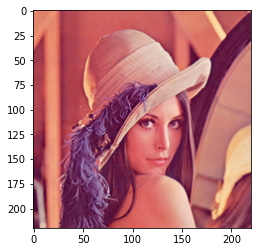

In [10]:
rgb_image = cv2.cvtColor(cv2.imread('lenna.png'),cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [11]:
hsv_image = rgb_to_hsv_convert(rgb_image)
cv2.imshow('image',hsv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Task3: Red Rose Segmentation or Extraction

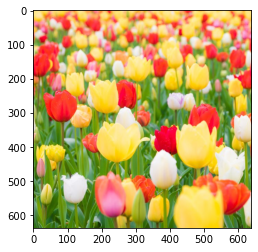

In [12]:
rose_image = cv2.imread('tulips.jpg')
# Convert BGR to RGB image
plt.imshow(rose_image[:,:,::-1])

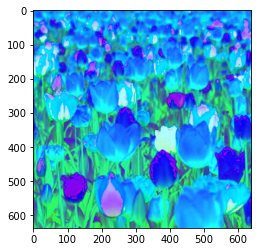

In [13]:
hsv_rose_image = cv2.cvtColor(rose_image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_rose_image)

In [15]:
lower_red_level = np.array([0,120,70])
upper_red_level = np.array([8,255,255])
mask1 = cv2.inRange(hsv_rose_image,lower_red_level,upper_red_level)

In [16]:
type(mask1)

numpy.ndarray

In [17]:
mask1.dtype

dtype('uint8')

In [18]:
lower_red_level = np.array([170,120,70])
upper_red_level = np.array([180,255,255])
mask2 = cv2.inRange(hsv_rose_image,lower_red_level,upper_red_level)

In [19]:
mask = mask1 | mask2

In [20]:
res = cv2.bitwise_and(rose_image,rose_image,mask=mask)

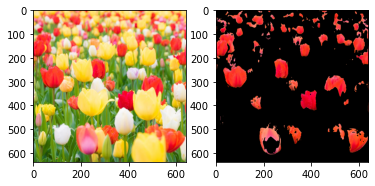

In [21]:
plt.figure(1)
plt.subplot(121)
plt.imshow(rose_image[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()